In [200]:
import numpy as np # linear algebra
import dask.array as da
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import gc
import sys

import matplotlib.pyplot as plt 
import seaborn as sns

import warnings
warnings.simplefilter("ignore")
df_train = pd.read_parquet("train.parquet")
df_train["S_2"] = pd.to_datetime(df_train["S_2"])
df_train = df_train.drop(['S_2'],axis = 1)

In [201]:
df_train = df_train.groupby(["customer_ID"]).tail(1).set_index("customer_ID")
df_train

,P_2,D_39,B_1,B_2,R_1,S_3,D_41,B_3,D_42,D_43,D_44,B_4,D_45,B_5,R_2,D_46,D_47,D_48,D_49,B_6,B_7,B_8,D_50,D_51,B_9,R_3,D_52,P_3,B_10,D_53,S_5,B_11,S_6,D_54,R_4,S_7,B_12,S_8,D_55,D_56,B_13,R_5,D_58,S_9,B_14,D_59,D_60,D_61,B_15,S_11,D_62,D_63,D_64,D_65,B_16,B_17,B_18,B_19,D_66,B_20,D_68,S_12,R_6,S_13,B_21,D_69,B_22,D_70,D_71,D_72,S_15,B_23,D_73,P_4,D_74,D_75,D_76,B_24,R_7,D_77,B_25,B_26,D_78,D_79,R_8,R_9,S_16,D_80,R_10,R_11,B_27,D_81,D_82,S_17,R_12,B_28,R_13,D_83,R_14,R_15,D_84,R_16,B_29,B_30,S_18,D_86,D_87,R_17,R_18,D_88,B_31,S_19,R_19,B_32,S_20,R_20,R_21,B_33,D_89,R_22,R_23,D_91,D_92,D_93,D_94,R_24,R_25,D_96,S_22,S_23,S_24,S_25,S_26,D_102,D_103,D_104,D_105,D_106,D_107,B_36,B_37,R_26,R_27,B_38,D_108,D_109,D_110,D_111,B_39,D_112,B_40,S_27,D_113,D_114,D_115,D_116,D_117,D_118,D_119,D_120,D_121,D_122,D_123,D_124,D_125,D_126,D_127,D_128,D_129,B_41,B_42,D_130,D_131,D_132,D_133,R_28,D_134,D_135,D_136,D_137,D_138,D_139,D_140,D_141,D_142,D_143,D_144,D_145
customer_ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0000099d6bd597052cdcda90ffabf56573fe9d7c79be5fbac11a8ed792feb62a,0.934745,0,0.009382,1.007647,0.006104,0.135021,0.0,0.007174,NaN,NaN,0,5,0.740102,0.231717,0,0.420521,0.539715,0.192376,-1,0.149564,0.058425,0.000000,0.153461,2,0.009535,0,0.203524,0.629392,0.326101,NaN,0.034643,0.010260,0,1.0,0,0.105671,0.112294,1544,0.187285,0.166636,0.100107,0,0.007174,0.007397,0.010239,8,0.258461,0.227637,0.014553,15,0.446568,0,0,0,0,NaN,1.000000,0,-1,0,6,0.184036,0.003945,702,0.005375,0.005469,0,0,0.377991,0,6,0.040367,NaN,0.0,0,0,NaN,0.002230,0.0,0.421334,0.006475,0.001068,0,0,0,-1,0.000026,1,0,0,0.007236,0,1,0.006550,1.0,0.084745,0,0,0.0,0,0,0,NaN,0,0,0,-1,0,0,NaN,1,0.003511,0,0,0,0,0,1,0,0,0,2,0,0,0,0,0,0,0.917811,0.131801,0.936067,0.971994,0.001281,0.943340,1,1.014510,1.073985,-1,2,0.007441,0.008676,-1,1.006130,2,-1,0,NaN,-1,NaN,1.0,0.100454,0.928955,0,1,0.255787,0,5,0.260255,0.256656,0,0.719791,3,0,16,0,2,1,0.999737,1,0,NaN,0.000000,0.00000,NaN,0.006210,0,NaN,-1,-1,-1,-1,0,0,0.000000,NaN,0,0.002970,0
00000fd6641609c6ece5454664794f0340ad84dddce9a267a310b5ae68e9d8e5,0.880519,6,0.034684,1.004028,0.006911,0.165509,0.0,0.005068,NaN,0.060646,0,1,0.266275,0.027000,0,0.438828,0.402195,0.014696,-1,0.167634,0.028411,0.000000,NaN,1,0.012926,1,0.242366,0.570898,0.297130,NaN,0.043929,0.014570,0,1.0,0,0.208516,0.019050,1284,0.036112,0.748383,0.017684,0,0.009756,0.127805,0.018667,15,0.411989,0.048978,0.009538,14,0.233980,3,0,0,0,NaN,1.000000,0,-1,0,6,0.192371,0.007744,290,0.006190,0.007636,0,0,0.007636,0,6,0.014705,NaN,0.0,0,0,NaN,0.002383,0.0,0.227755,0.021153,0.000182,0,0,0,-1,0.006931,0,0,0,0.005375,0,-1,0.005414,1.0,0.019672,0,0,0.0,0,0,0,NaN,0,0,0,-1,0,0,NaN,1,0.005091,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0.920889,0.132865,0.930629,0.977674,0.003213,0.001621,0,0.000000,NaN,-1,0,0.007457,0.032899,-1,1.007599,2,-1,0,NaN,-1,NaN,1.0,0.019811,0.292214,0,1,0.454329,0,0,0.446036,0.436884,0,0.551341,2,0,4,0,2,0,0.999252,0,0,NaN,0.000000,0.00000,NaN,0.002996,0,NaN,-1,-1,-1,-1,0,0,0.000000,NaN,0,0.003169,0
00001b22f846c82c51f6e3958ccd81970162bae8b007e80662ef27519fcc18c1,0.880875,0,0.004284,0.812649,0.006450,NaN,0.0,0.007196,NaN,NaN,0,2,0.251598,0.001557,0,0.433713,0.339125,0.080370,-1,0.183628,0.026981,0.000000,NaN,1,0.009392,0,0.202159,0.628938,0.296313,NaN,0.001824,0.005092,1,1.0,0,NaN,0.007158,0,0.098963,0.209386,0.001749,0,0.002847,NaN,0.006699,15,0.002820,0.137834,0.006031,12,0.438647,3,2,0,0,NaN,1.000000,0,-1,0,6,0.190958,0.008575,0,0.000036,0.009486,0,0,0.015025,0,8,0.020228,NaN,0.0,0,0,NaN,0.000552,0.0,0.407122,0.007427,0.009752,0,0,0,-1,0.009305,0,0,0,0.005475,0,-1,0.000159,1.0,0.030023,0,0,0.0,0,0,0,NaN,0,0,0,-1,0,0,NaN,1,0.006258,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0.302868,0.132692,0.086479,0.972368,0.004705,0.009786,0,0.000000,NaN,-1,0,0.005196,0.004723,-1,1.003010,1,-1,0,NaN,-1,NaN,1.0,0.024902,NaN,0,1,0.388621,0,0,0

In [202]:

df_train_labels = pd.read_csv("train_labels.csv")
df_train_labels["target"] = df_train_labels["target"].astype("int8")
df_train_labels


,customer_ID,target
0,0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...,0
1,00000fd6641609c6ece5454664794f0340ad84dddce9a2...,0
2,00001b22f846c82c51f6e3958ccd81970162bae8b007e8...,0
3,000041bdba6ecadd89a52d11886e8eaaec9325906c9723...,0
4,00007889e4fcd2614b6cbe7f8f3d2e5c728eca32d9eb8a...,0
...,...,...
458908,ffff41c8a52833b56430603969b9ca48d208e7c192c6a4...,0
458909,ffff518bb2075e4816ee3fe9f3b152c57fc0e6f01bf7fd...,0
458910,ffff9984b999fccb2b6127635ed0736dda94e544e67e02...,0
458911,ffffa5c46bc8de74f5a4554e74e239c8dee6b9baf38814...,1


In [203]:
df_train = df_train.merge(df_train_labels, on="customer_ID", how='left')
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 458913 entries, 0 to 458912
Columns: 190 entries, customer_ID to target
dtypes: float32(93), int16(9), int8(87), object(1)
memory usage: 215.8+ MB


In [204]:
tmp = df_train.isna().sum().mul(100).div(len(df_train)).sort_values(ascending=False)

tmp

D_88           99.819792
D_110          99.198541
B_39           99.105495
D_73           99.076296
B_42           98.661620
D_134          96.427427
B_29           94.045930
D_76           89.253737
D_132          88.721174
D_42           86.945238
D_142          82.498861
D_53           71.022612
D_50           57.142639
D_105          53.518205
D_56           53.329062
B_17           53.271753
D_77           46.596414
S_9            40.063803
D_43           29.269600
S_27           25.531201
D_46           20.727894
S_3            18.515492
S_7            18.515492
D_62           12.846226
D_48           12.636818
D_61           10.535330
D_55            6.619337
R_27            6.261753
P_3             4.841876
D_69            1.386973
D_121           1.311142
D_119           1.311142
D_118           1.311142
D_115           1.311142
B_8             0.891454
P_2             0.646964
D_128           0.616675
D_104           0.616675
D_130           0.616675
D_131           0.616675


In [205]:
missingDF = pd.DataFrame(tmp).reset_index()
drop_cols = missingDF[missingDF[0]>75]["index"].values
print(drop_cols)

['D_88' 'D_110' 'B_39' 'D_73' 'B_42' 'D_134' 'B_29' 'D_76' 'D_132' 'D_42'
 'D_142']


In [206]:
df_train

,customer_ID,P_2,D_39,B_1,B_2,R_1,S_3,D_41,B_3,D_42,D_43,D_44,B_4,D_45,B_5,R_2,D_46,D_47,D_48,D_49,B_6,B_7,B_8,D_50,D_51,B_9,R_3,D_52,P_3,B_10,D_53,S_5,B_11,S_6,D_54,R_4,S_7,B_12,S_8,D_55,D_56,B_13,R_5,D_58,S_9,B_14,D_59,D_60,D_61,B_15,S_11,D_62,D_63,D_64,D_65,B_16,B_17,B_18,B_19,D_66,B_20,D_68,S_12,R_6,S_13,B_21,D_69,B_22,D_70,D_71,D_72,S_15,B_23,D_73,P_4,D_74,D_75,D_76,B_24,R_7,D_77,B_25,B_26,D_78,D_79,R_8,R_9,S_16,D_80,R_10,R_11,B_27,D_81,D_82,S_17,R_12,B_28,R_13,D_83,R_14,R_15,D_84,R_16,B_29,B_30,S_18,D_86,D_87,R_17,R_18,D_88,B_31,S_19,R_19,B_32,S_20,R_20,R_21,B_33,D_89,R_22,R_23,D_91,D_92,D_93,D_94,R_24,R_25,D_96,S_22,S_23,S_24,S_25,S_26,D_102,D_103,D_104,D_105,D_106,D_107,B_36,B_37,R_26,R_27,B_38,D_108,D_109,D_110,D_111,B_39,D_112,B_40,S_27,D_113,D_114,D_115,D_116,D_117,D_118,D_119,D_120,D_121,D_122,D_123,D_124,D_125,D_126,D_127,D_128,D_129,B_41,B_42,D_130,D_131,D_132,D_133,R_28,D_134,D_135,D_136,D_137,D_138,D_139,D_140,D_141,D_142,D_143,D_144,D_145,target
0,0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...,0.934745,0,0.009382,1.007647,0.006104,0.135021,0.0,0.007174,NaN,NaN,0,5,0.740102,0.231717,0,0.420521,0.539715,0.192376,-1,0.149564,0.058425,0.000000,0.153461,2,0.009535,0,0.203524,0.629392,0.326101,NaN,0.034643,0.010260,0,1.0,0,0.105671,0.112294,1544,0.187285,0.166636,0.100107,0,0.007174,0.007397,0.010239,8,0.258461,0.227637,0.014553,15,0.446568,0,0,0,0,NaN,1.000000,0,-1,0,6,0.184036,0.003945,702,0.005375,0.005469,0,0,0.377991,0,6,0.040367,NaN,0.0,0,0,NaN,0.002230,0.0,0.421334,0.006475,0.001068,0,0,0,-1,0.000026,1,0,0,0.007236,0,1,0.006550,1.0,0.084745,0,0,0.0,0,0,0,NaN,0,0,0,-1,0,0,NaN,1,0.003511,0,0,0,0,0,1,0,0,0,2,0,0,0,0,0,0,0.917811,0.131801,0.936067,0.971994,0.001281,0.943340,1,1.014510,1.073985,-1,2,0.007441,0.008676,-1,1.006130,2,-1,0,NaN,-1,NaN,1.0,0.100454,0.928955,0,1,0.255787,0,5,0.260255,0.256656,0,0.719791,3,0,16,0,2,1,0.999737,1,0,NaN,0.000000,0.00000,NaN,0.006210,0,NaN,-1,-1,-1,-1,0,0,0.000000,NaN,0,0.002970,0,0
1,00000fd6641609c6ece5454664794f0340ad84dddce9a2...,0.880519,6,0.034684,1.004028,0.006911,0.165509,0.0,0.005068,NaN,0.060646,0,1,0.266275,0.027000,0,0.438828,0.402195,0.014696,-1,0.167634,0.028411,0.000000,NaN,1,0.012926,1,0.242366,0.570898,0.297130,NaN,0.043929,0.014570,0,1.0,0,0.208516,0.019050,1284,0.036112,0.748383,0.017684,0,0.009756,0.127805,0.018667,15,0.411989,0.048978,0.009538,14,0.233980,3,0,0,0,NaN,1.000000,0,-1,0,6,0.192371,0.007744,290,0.006190,0.007636,0,0,0.007636,0,6,0.014705,NaN,0.0,0,0,NaN,0.002383,0.0,0.227755,0.021153,0.000182,0,0,0,-1,0.006931,0,0,0,0.005375,0,-1,0.005414,1.0,0.019672,0,0,0.0,0,0,0,NaN,0,0,0,-1,0,0,NaN,1,0.005091,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0.920889,0.132865,0.930629,0.977674,0.003213,0.001621,0,0.000000,NaN,-1,0,0.007457,0.032899,-1,1.007599,2,-1,0,NaN,-1,NaN,1.0,0.019811,0.292214,0,1,0.454329,0,0,0.446036,0.436884,0,0.551341,2,0,4,0,2,0,0.999252,0,0,NaN,0.000000,0.00000,NaN,0.002996,0,NaN,-1,-1,-1,-1,0,0,0.000000,NaN,0,0.003169,0,0
2,00001b22f846c82c51f6e3958ccd81970162bae8b007e8...,0.880875,0,0.004284,0.812649,0.006450,NaN,0.0,0.007196,NaN,NaN,0,2,0.251598,0.001557,0,0.433713,0.339125,0.080370,-1,0.183628,0.026981,0.000000,NaN,1,0.009392,0,0.202159,0.628938,0.296313,NaN,0.001824,0.005092,1,1.0,0,NaN,0.007158,0,0.098963,0.209386,0.001749,0,0.002847,NaN,0.006699,15,0.002820,0.137834,0.006031,12,0.438647,3,2,0,0,NaN,1.000000,0,-1,0,6,0.190958,0.008575,0,0.000036,0.009486,0,0,0.015025,0,8,0.020228,NaN,0.0,0,0,NaN,0.000552,0.0,0.407122,0.007427,0.009752,0,0,0,-1,0.009305,0,0,0,0.005475,0,-1,0.000159,1.0,0.030023,0,0,0.0,0,0,0,NaN,0,0,0,-1,0,0,NaN,1,0.006258,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0.302868,0.132692,0.086479,0.972368,0.004705,0.009786,0,0.000000,NaN,-1,0,0.005196,0.004723,-1,1.003010,1,-1,0,NaN,-1,NaN,1.0,0.024902,NaN,0,1,0.388621,0,0,0.368051,0.369018,0,0.444615,1,0,7,0,2,0,0.000000,0,0,NaN,0.000000,0.00000,NaN,0.009881,0,NaN,-1,-1,-1,-1,0,0,0.000000,NaN,0,0.000834,0,0
3,000041bdba6ecadd89a52d11886e8eaaec9325906c9723...,0.621776,0,0.012564,1.00618

In [207]:
df_train = df_train[['S_3', 'S_5', 'S_6', 'S_7', 'S_8', 'S_11', 'S_12', 'S_13', 'S_15',
       'S_16', 'S_22', 'S_23', 'S_24', 'S_25', 'S_27','R_1', 'R_2', 'R_3', 'R_4', 'R_5', 'R_6', 'R_7', 'R_8', 'R_9', 'R_10',
       'R_12', 'R_13', 'R_24', 'R_26', 'R_27','B_1', 'B_2', 'B_3', 'B_4', 'B_6', 'B_7', 'B_9', 'B_10', 'B_11', 'B_14',
       'B_16', 'B_17', 'B_18', 'B_19', 'B_20', 'B_22', 'B_23', 'B_25', 'B_33',
       'B_37', 'B_38', 'B_40','D_39', 'D_41', 'D_44', 'D_47', 'D_48', 'D_51', 'D_54', 'D_55', 'D_58',
       'D_61', 'D_62', 'D_70', 'D_74', 'D_75', 'D_78', 'D_112','P_2','P_3','P_4','target']]

In [208]:
#df_train = df_train.astype('float32')

In [209]:
numeric_data = df_train.select_dtypes(include=[np.number])
categorical_data = df_train.select_dtypes(exclude=[np.number])

numeric_data.shape[1]
categorical_data.shape[1]

0

In [210]:
from sklearn.impute import SimpleImputer
imp_mean = SimpleImputer(missing_values=np.nan, strategy='mean')
imp_mean.fit(numeric_data)
numeric_columns =df_train.select_dtypes(np.number).columns
df_train[numeric_columns] = df_train[numeric_columns].fillna(df_train[numeric_columns].mean())
df_train[numeric_columns] = df_train[numeric_columns].round(3)
df_train.isna().sum()

S_3       0
S_5       0
S_6       0
S_7       0
S_8       0
S_11      0
S_12      0
S_13      0
S_15      0
S_16      0
S_22      0
S_23      0
S_24      0
S_25      0
S_27      0
R_1       0
R_2       0
R_3       0
R_4       0
R_5       0
R_6       0
R_7       0
R_8       0
R_9       0
R_10      0
R_12      0
R_13      0
R_24      0
R_26      0
R_27      0
B_1       0
B_2       0
B_3       0
B_4       0
B_6       0
B_7       0
B_9       0
B_10      0
B_11      0
B_14      0
B_16      0
B_17      0
B_18      0
B_19      0
B_20      0
B_22      0
B_23      0
B_25      0
B_33      0
B_37      0
B_38      0
B_40      0
D_39      0
D_41      0
D_44      0
D_47      0
D_48      0
D_51      0
D_54      0
D_55      0
D_58      0
D_61      0
D_62      0
D_70      0
D_74      0
D_75      0
D_78      0
D_112     0
P_2       0
P_3       0
P_4       0
target    0
dtype: int64

In [211]:
#categorical_data
#cols = ["D_68", "B_30", "B_38", "D_114", "D_116", "D_117", "D_120", "D_126"]
#df_train[cols] = df_train[cols].apply(pd.to_numeric, errors='coerce')
#df_train.isna().sum()

In [212]:
data = df_train.sample(frac=0.1, random_state=786)
data_unseen = df_train.drop(data.index).reset_index(drop=True)
data.reset_index(drop=True, inplace=True)

print('Data for Modeling: ' + str(data.shape))
print('Unseen Data For Predictions ' + str(data_unseen.shape))
from pycaret.regression import *
df_train["target"].unique
#data.columns()
data.columns

Data for Modeling: (45891, 72)
Unseen Data For Predictions (413022, 72)


Index(['S_3', 'S_5', 'S_6', 'S_7', 'S_8', 'S_11', 'S_12', 'S_13', 'S_15',
       'S_16', 'S_22', 'S_23', 'S_24', 'S_25', 'S_27', 'R_1', 'R_2', 'R_3',
       'R_4', 'R_5', 'R_6', 'R_7', 'R_8', 'R_9', 'R_10', 'R_12', 'R_13',
       'R_24', 'R_26', 'R_27', 'B_1', 'B_2', 'B_3', 'B_4', 'B_6', 'B_7', 'B_9',
       'B_10', 'B_11', 'B_14', 'B_16', 'B_17', 'B_18', 'B_19', 'B_20', 'B_22',
       'B_23', 'B_25', 'B_33', 'B_37', 'B_38', 'B_40', 'D_39', 'D_41', 'D_44',
       'D_47', 'D_48', 'D_51', 'D_54', 'D_55', 'D_58', 'D_61', 'D_62', 'D_70',
       'D_74', 'D_75', 'D_78', 'D_112', 'P_2', 'P_3', 'P_4', 'target'],
      dtype='object')

In [213]:
df_train

,S_3,S_5,S_6,S_7,S_8,S_11,S_12,S_13,S_15,S_16,S_22,S_23,S_24,S_25,S_27,R_1,R_2,R_3,R_4,R_5,R_6,R_7,R_8,R_9,R_10,R_12,R_13,R_24,R_26,R_27,B_1,B_2,B_3,B_4,B_6,B_7,B_9,B_10,B_11,B_14,B_16,B_17,B_18,B_19,B_20,B_22,B_23,B_25,B_33,B_37,B_38,B_40,D_39,D_41,D_44,D_47,D_48,D_51,D_54,D_55,D_58,D_61,D_62,D_70,D_74,D_75,D_78,D_112,P_2,P_3,P_4,target
0,0.135,0.035,0,0.106,1544,15,0.184,702,6,0.000,0.918,0.132,0.936,0.972,0.929,0.006,0,0,0,0,0.004,0.0,0,-1,0,1.0,0,0,-1,1.006,0.009,1.008,0.007,5,0.150,0.058,0.010,0.326,0.010,0.010,0,0.725,1.000,0,0,0,0.040,0.006,1,0.009,2,0.100,0,0.0,0,0.540,0.192,2,1.0,0.187,0.007,0.228,0.447,0,0,0,0,1.0,0.935,0.629,0.0,0
1,0.166,0.044,0,0.209,1284,14,0.192,290,6,0.007,0.921,0.133,0.931,0.978,0.292,0.007,0,1,0,0,0.008,0.0,0,-1,0,1.0,0,0,-1,1.008,0.035,1.004,0.005,1,0.168,0.028,0.013,0.297,0.015,0.019,0,0.725,1.000,0,0,0,0.015,0.021,1,0.033,2,0.020,6,0.0,0,0.402,0.015,1,1.0,0.036,0.010,0.049,0.234,0,0,0,0,1.0,0.881,0.571,0.0,0
2,0.229,0.002,1,0.222,0,12,0.191,0,8,0.009,0.303,0.133,0.086,0.972,0.309,0.006,0,0,0,0,0.009,0.0,0,-1,0,1.0,0,0,-1,1.003,0.004,0.813,0.007,2,0.184,0.027,0.009,0.296,0.005,0.007,0,0.725,1.000,0,0,0,0.020,0.007,1,0.005,1,0.025,0,0.0,0,0.339,0.080,1,1.0,0.099,0.003,0.138,0.439,0,0,0,0,1.0,0.881,0.629,0.0,0
3,0.288,0.023,0,0.279,528,14,0.055,435,8,0.007,0.932,0.133,0.957,0.974,0.681,0.008,0,2,0,0,0.001,0.0,0,-1,0,1.0,0,0,-1,1.004,0.013,1.006,0.010,0,0.174,0.012,0.021,0.412,0.005,0.017,1,1.007,1.000,0,0,0,0.005,0.014,1,0.007,2,0.031,0,0.0,0,0.414,0.409,1,1.0,0.021,0.009,0.027,0.435,0,0,0,0,1.0,0.622,0.672,0.0,0
4,0.229,0.009,1,0.222,0,13,0.186,0,8,0.008,0.298,0.132,0.082,0.972,0.309,0.001,0,0,0,0,0.004,0.0,0,-1,0,1.0,0,0,-1,1.007,0.008,0.816,0.006,21,0.049,0.160,0.004,0.125,0.001,0.009,0,0.725,0.531,0,0,0,0.145,0.010,1,0.008,1,0.117,0,0.0,0,0.480,0.325,0,1.0,0.254,0.383,0.601,0.423,0,2,2,0,1.0,0.872,0.570,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
458908,0.129,0.262,0,0.088,1544,12,0.281,435,6,0.004,0.949,0.137,0.964,0.974,0.545,0.002,0,7,0,0,0.004,0.0,0,-1,0,1.0,0,0,-1,1.003,0.029,1.010,0.006,4,0.317,0.030,0.170,0.436,0.024,0.155,0,0.725,1.000,0,0,0,0.025,0.271,1,0.028,2,0.008,15,0.0,0,0.215,0.059,2,1.0,0.035,0.009,0.074,0.457,0,0,0,0,1.0,0.844,0.531,0.0,0
458909,0.229,0.010,1,0.222,0,12,0.188,0,8,0.006,0.301,0.139,0.079,0.976,0.309,0.007,0,1,0,0,0.009,0.0,0,-1,0,1.0,0,0,-1,1.007,0.292,0.056,0.233,19,0.012,0.272,0.143,0.021,0.234,0.070,12,0.861,0.098,75,17,0,0.263,0.114,0,0.291,7,0.204,1,0.0,1,0.775,0.171,1,1.0,0.146,0.484,0.730,0.094,1,4,5,0,1.0,0.831,0.562,0.0,0
458910,0.067,0.026,0,0.041,2694,19,0.398,544,4,0.004,0.986,0.141,0.967,0.973,0.424,0.001,0,0,0,0,0.003,0.0,0,-1,0,1.0,0,0,-1,1.009,0.021,1.007,0.006,6,0.190,0.049,0.046,0.303,0.011,0.018,2,0.228,1.000,0,0,0,0.037,0.032,1,0.020,3,0.051,9,0.0,0,0.326,0.114,1,1.0,0.107,0.008,0.136,0.223,0,0,0,0,1.0,0.801,0.616,0.0,0
458911,0.409,0.010,0,0.366,0,14,0.192,0,8,0.004,0.902,0.132,0.906,0.979,0.007,0.001,0,0,0,0,0.003,0.0,0,-1,0,1.0,0,0,-1,1.004,0.016,0.714,0.050,18,0.018,0.303,0.016,0.035,0.003,0.012,6,0.737,0.465,0,3,0,0.264,0.009,0,0.021,3,0.329,0,0.0,1,0.592,0.349,0,1.0,0.297,0.259,0.806,0.313,0,1,2,0,1.0,0.754,0.486,0.0,1


In [214]:
#from sklearn.model_selection import StratifiedKFold
y = df_train['target']
#col = df_train["target"]
X = df_train.loc[:, df_train.columns != 'target']

In [215]:
y

0         0
1         0
2         0
3         0
4         0
         ..
458908    0
458909    0
458910    0
458911    1
458912    0
Name: target, Length: 458913, dtype: int8

In [216]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X = scaler.fit_transform(X)
print(X)

[[1.4301577e-01 2.7073859e-04 0.0000000e+00 ... 9.4894493e-01
  5.7299161e-01 0.0000000e+00]
 [1.4990008e-01 3.4035707e-04 0.0000000e+00 ... 9.1218519e-01
  5.5486089e-01 0.0000000e+00]
 [1.6389075e-01 1.5470776e-05 1.0000000e+00 ... 9.1218519e-01
  5.7299161e-01 0.0000000e+00]
 ...
 [1.2791473e-01 2.0112008e-04 0.0000000e+00 ... 8.5772634e-01
  5.6892782e-01 0.0000000e+00]
 [2.0386410e-01 7.7353878e-05 0.0000000e+00 ... 8.2573187e-01
  5.2829009e-01 0.0000000e+00]
 [1.3946259e-01 3.8676939e-05 0.0000000e+00 ... 9.8093951e-01
  5.6767738e-01 0.0000000e+00]]


In [217]:
from pandas import DataFrame
X = DataFrame(X)
print(X)

              0         1    2         3         4         5         6   \
0       0.143016  0.000271  0.0  0.144431  0.399276  0.197368  0.021415   
1       0.149900  0.000340  0.0  0.175949  0.332040  0.184211  0.021708   
2       0.163891  0.000015  1.0  0.179927  0.000000  0.157895  0.021671   
3       0.176993  0.000178  0.0  0.197368  0.136540  0.184211  0.016684   
4       0.163891  0.000070  1.0  0.179927  0.000000  0.171053  0.021488   
...          ...       ...  ...       ...       ...       ...       ...   
458908  0.141683  0.002027  0.0  0.138923  0.399276  0.157895  0.024972   
458909  0.163891  0.000077  1.0  0.179927  0.000000  0.157895  0.021561   
458910  0.127915  0.000201  0.0  0.124541  0.696664  0.250000  0.029262   
458911  0.203864  0.000077  0.0  0.223990  0.000000  0.184211  0.021708   
458912  0.139463  0.000039  0.0  0.131885  0.000000  0.157895  0.021671   

              7         8         9         10        11        12        13  \
0       0.678917  0

In [218]:
from sklearn.model_selection import StratifiedKFold
#skf = StratifiedKFold(n_splits=7)

In [221]:
from sklearn.linear_model import LogisticRegression
skf = StratifiedKFold(n_splits=10)
model = LogisticRegression(solver='newton-cg')
x = X
y = y
dataset = df_train

In [224]:
def training(train, test, fold_no):
  x_train = train.drop(['target'],axis=1)
  y_train = train.target
  x_test = test.drop(['target'],axis=1)
  y_test = test.target
  model.fit(x_train, y_train)
  score = model.score(x_test,y_test)
  print('For Fold {} the accuracy is {}'.format(str(fold_no),score))

In [225]:
fold_no = 1
for train_index,test_index in skf.split(x, y):
  train = dataset.iloc[train_index,:]
  test = dataset.iloc[test_index,:]
  training(train, test, fold_no)
  fold_no += 1

For Fold 1 the accuracy is 0.8895885993201429
For Fold 2 the accuracy is 0.8907216944129696
For Fold 3 the accuracy is 0.8918329992155496
For Fold 4 the accuracy is 0.8901745440282408
For Fold 5 the accuracy is 0.8914819899326666
For Fold 6 the accuracy is 0.8917652698786255
For Fold 7 the accuracy is 0.8907411039201586
For Fold 8 the accuracy is 0.8919178052341418
For Fold 9 the accuracy is 0.8921139221198057
For Fold 10 the accuracy is 0.8912640822819289


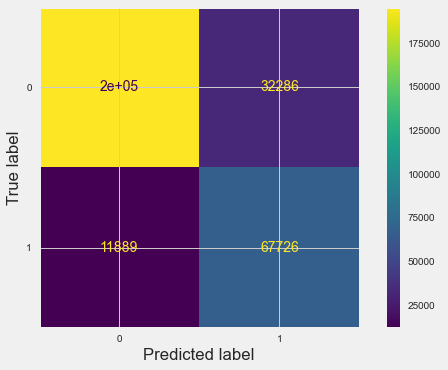

In [226]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(model, X_train,y_train)

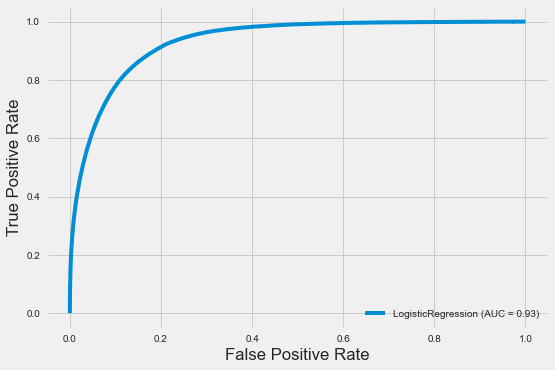

In [227]:
from sklearn.metrics import plot_roc_curve
plot_roc_curve(model, X_train,y_train )

In [228]:
from sklearn.metrics import f1_score
print('F1 score is {}'.format(f1_score(y_test,model.predict(X_test))))

F1 score is 0.7534898441297146


In [229]:
from sklearn.metrics import brier_score_loss
probs = model.predict_proba(X_test)
#  keeping the prediction for class 1
probs = probs[:,1] 
print('Brier loss: ', brier_score_loss(y_test,probs))

Brier loss:  0.11694888714099809
